# Panel 3

### `import packages.needed`

In [1]:
%matplotlib inline
#
from lrgsglib.core import *
#
move_to_rootf()
plt.style.use('ipynb/nb_plotsheet.mplstyle')
#
datpath = os.path.join('data')
subdatapath = os.path.join('plot', 'paper', 'panel_3/')
Isingdatapath = os.path.join(subdatapath, 'Ising')
plotpath = os.path.join(datpath, Isingdatapath)
plot_ene = os.path.join(plotpath, "plot_ene", "")
os.makedirs(plot_ene, exist_ok=True)
#

Current working directory: /home/opisthofulax/PhD/projects/complex-networks/lrgsglib


## Energy shots comparison

### Data

In [ ]:
side = 32
geo = 'squared'
pflip = 0.4
T_ising = .6
navg = 2
thrmSTEP = 300
eqSTEP = 0
gsN = 0
how_gsN = 5
howmany = 100
cell = 'randXERR'
init_nw_dict = True
#
IMPORT = False
args = dict(side1=side, geo=geo, pflip=pflip, sgpath=Isingdatapath,
            import_on=IMPORT, init_nw_dict=init_nw_dict)
#
np.random.seed(4)
random.seed(0)

In [6]:
l = Lattice2D(**args)
l.flip_sel_edges(l.nwDict[cell]['G'])
l.compute_k_eigvV(howmany=howmany)
if not l.import_on: l.export_edgel_bin(expoName=f"p={pflip:.3g}")

In [7]:
for ic in ["uniform"]+[f"ground_state_{n}" for n in range(how_gsN)]:
    ising_dyn = IsingDynamics(sg=l, T=T_ising, ic=ic, runlang="C2", 
                              in_suffix=f"p={pflip:.3g}", out_suffix=ic)
    ising_dyn.run(thrmSTEP=thrmSTEP, eqSTEP=eqSTEP)

### Frames

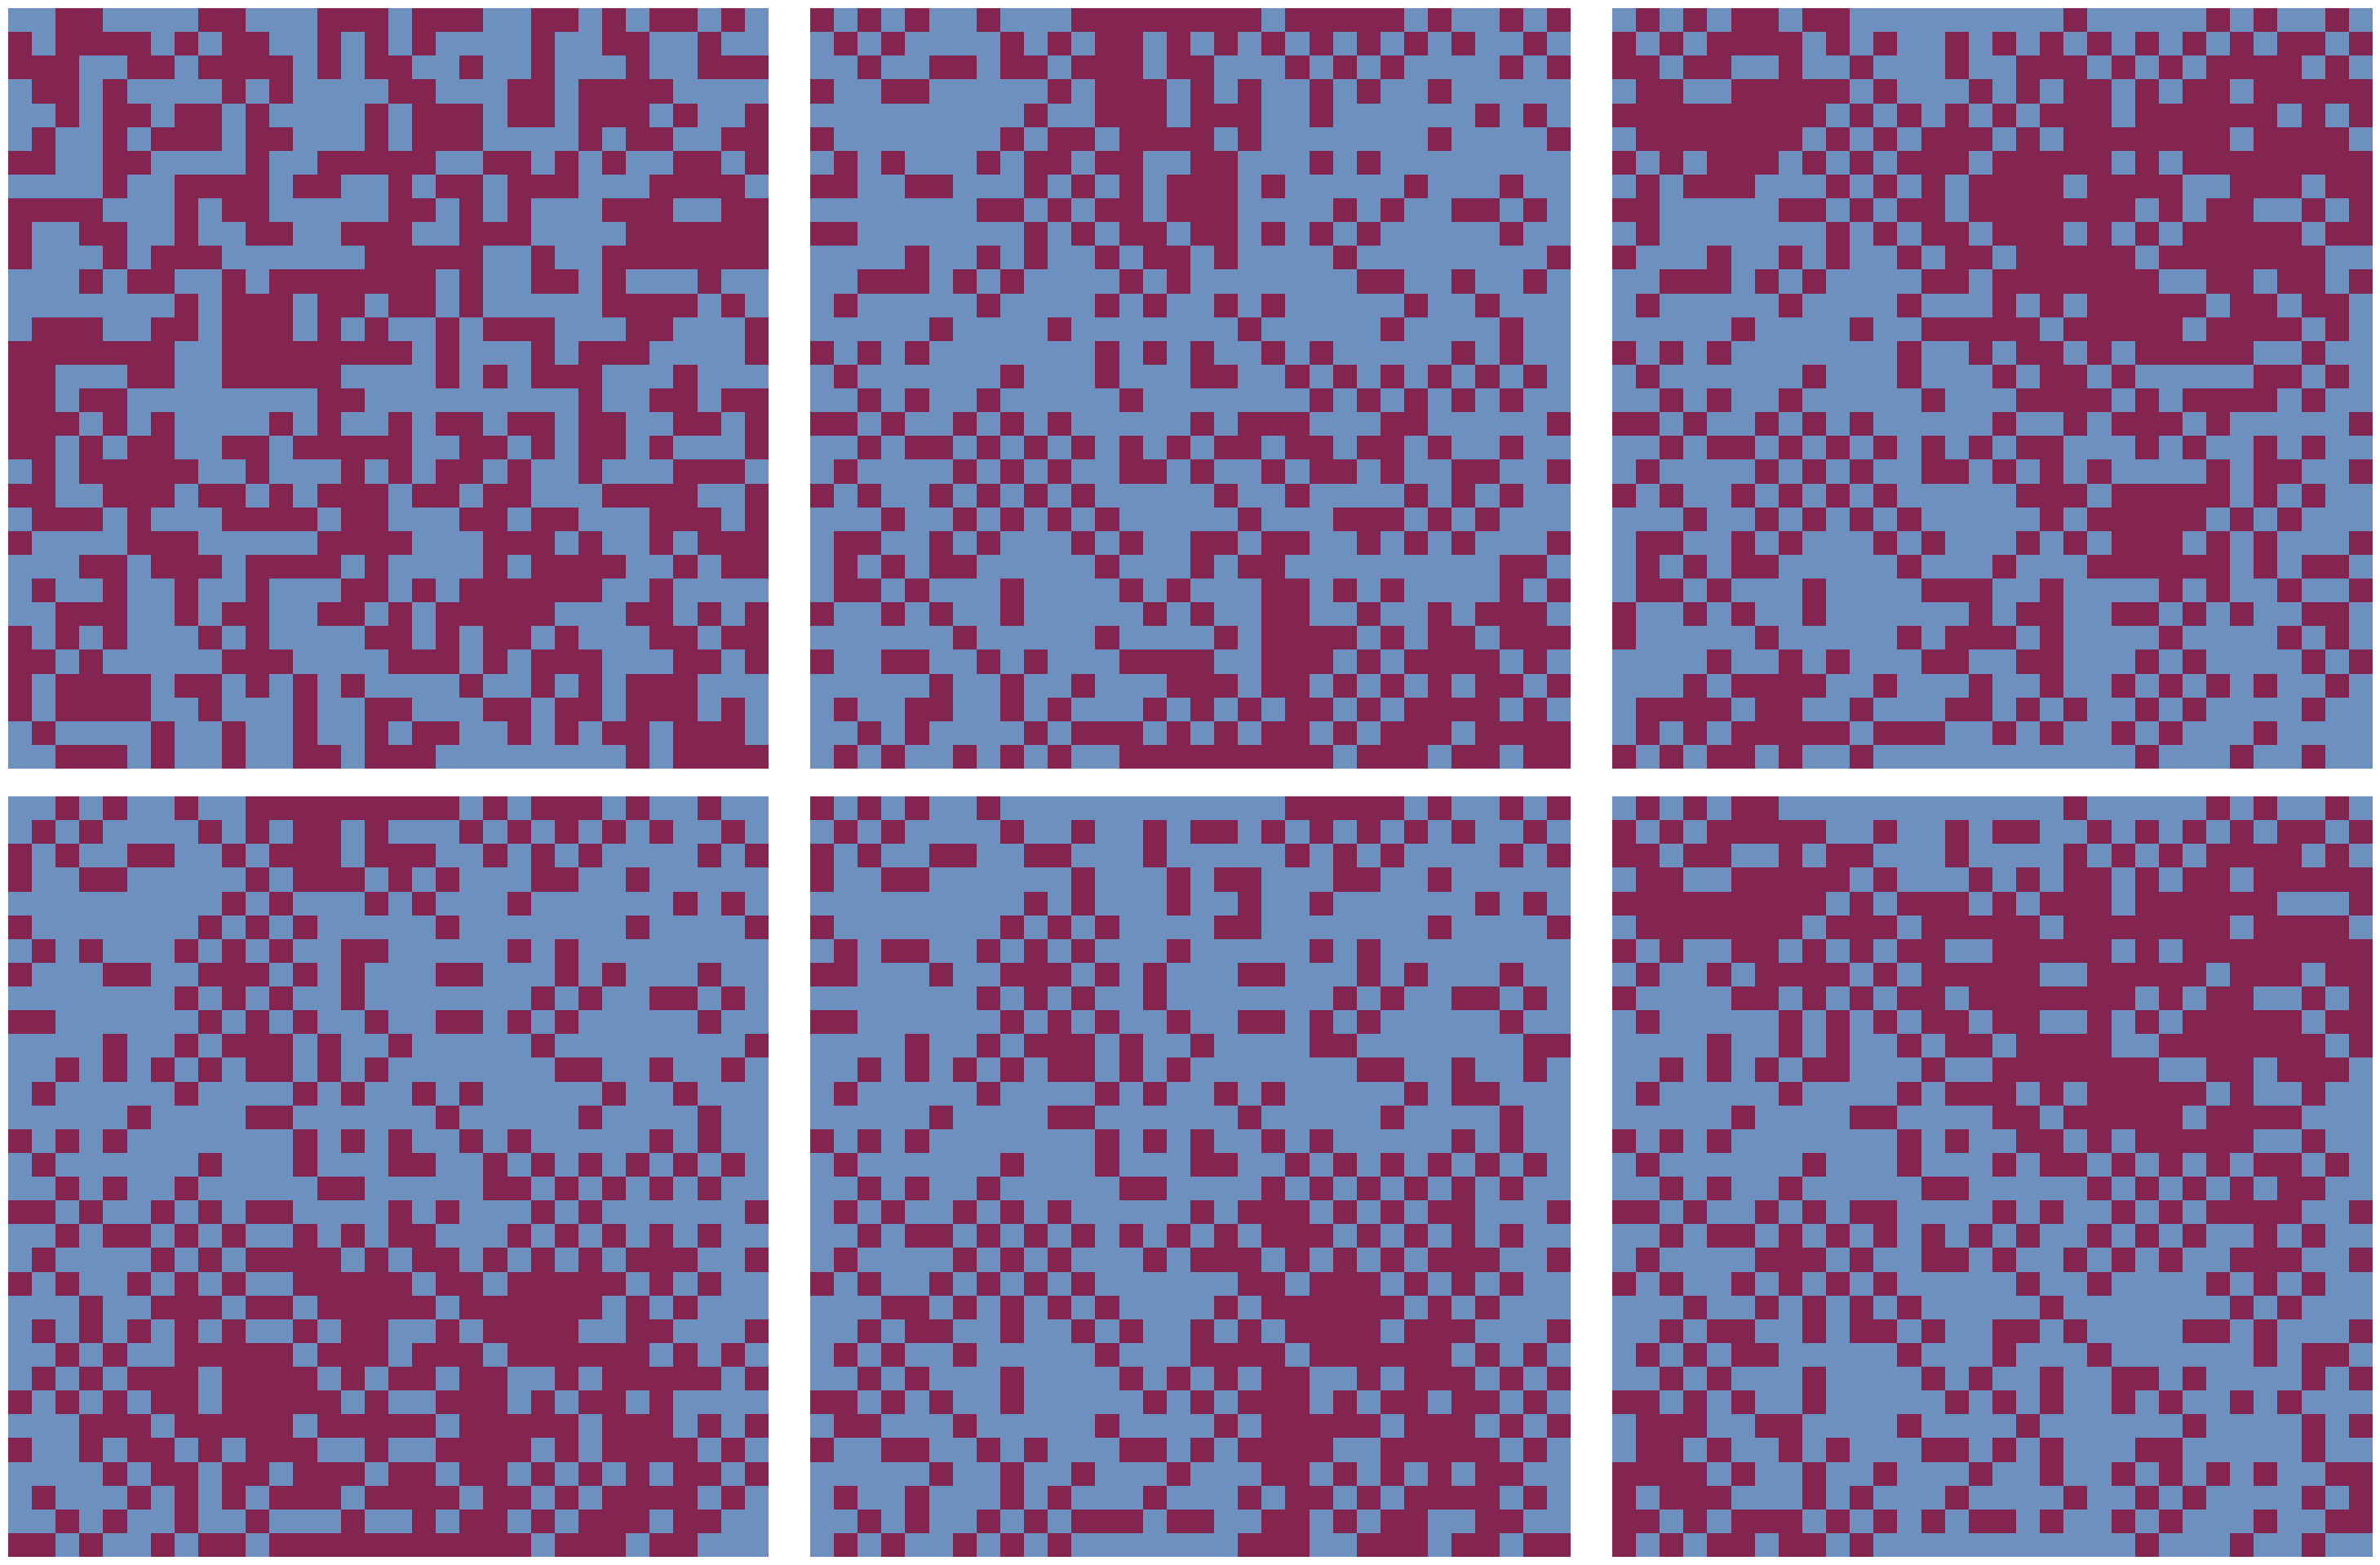

In [14]:
fsize = 10
in_suffix = lambda ic: f"p={pflip:.3g}_{ic}"
out_suffix = lambda ic: f"p={pflip:.3g}_T={T_ising:.3g}_{ic}"
def frame_import(basename, suffix):
    fName = f"{basename}_{suffix}.bin"
    fpath = os.path.join(l.isingpath, fName)
    return np.fromfile(fpath, dtype="int8")
#
ic = "uniform"
initFrame = frame_import("s", in_suffix(ic)).reshape(*l.syshape)
lastFrame = frame_import("sOut", out_suffix(ic)).reshape(-1, *l.syshape)
initFrames = [frame_import("s", in_suffix(ic)).reshape(*l.syshape)
              for ic in ["uniform"]+[f"ground_state_{n}" 
                                     for n in range(how_gsN)]]
lastFrames = [frame_import("sOut", out_suffix(ic)).reshape(-1, *l.syshape)
              for ic in ["uniform"]+[f"ground_state_{n}" 
                                     for n in range(how_gsN)]]

fig, ax = plt.subplots(ncols=how_gsN//2+1, nrows=2, 
                       figsize=((how_gsN//2+1)*fsize, 2*fsize))
# #
kwimshowD = dict(cmap=credcblu, origin="lower")
for i in range(how_gsN//2+1):
    ax[0][i].imshow(initFrames[i], **kwimshowD)
    ax[1][i].imshow(lastFrames[i][-1], **kwimshowD)
    ax[0][i].axis("off")
    ax[1][i].axis("off")
# #
fig.tight_layout()
# fname = f"Ising{l.N}_frames_p={pflip:.3g}_T={T_ising:.3g}.pdf"
# fig.savefig(os.path.join(plot_ene, fname), transparent=True)

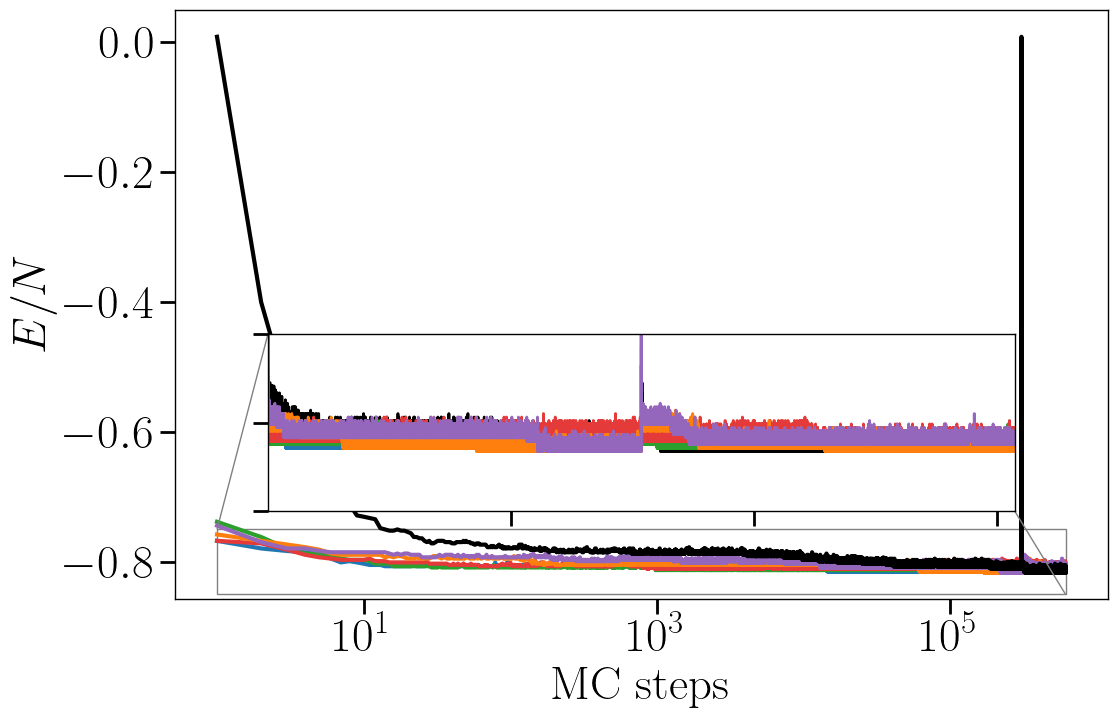

In [11]:
ic = "uniform"
path = os.path.join(l.isingpath, f"ene_p={pflip:.3g}_T={T_ising:.3g}_{ic}.bin")
ene = np.fromfile(path, dtype="float")
#
ic = "ground_state_0"
path = os.path.join(l.isingpath, f"ene_p={pflip:.3g}_T={T_ising:.3g}_{ic}.bin")
ene0 = np.fromfile(path, dtype="float")
#
ic = "ground_state_1"
path = os.path.join(l.isingpath, f"ene_p={pflip:.3g}_T={T_ising:.3g}_{ic}.bin")
ene1 = np.fromfile(path, dtype="float")
#
ic = "ground_state_2"
path = os.path.join(l.isingpath, f"ene_p={pflip:.3g}_T={T_ising:.3g}_{ic}.bin")
ene2 = np.fromfile(path, dtype="float")
#
ic = "ground_state_3"
path = os.path.join(l.isingpath, f"ene_p={pflip:.3g}_T={T_ising:.3g}_{ic}.bin")
ene3 = np.fromfile(path, dtype="float")
#
ic = "ground_state_4"
path = os.path.join(l.isingpath, f"ene_p={pflip:.3g}_T={T_ising:.3g}_{ic}.bin")
ene4 = np.fromfile(path, dtype="float")
#
fig, ax = plt.subplots(figsize=(12, 8))
x = np.arange(0, ene.size)+1
ax.plot(x, ene0/4, '-', lw=3)
ax.plot(x, ene1/4, '-', lw=3)
ax.plot(x, ene2/4, '-', lw=3)
ax.plot(x, ene3/4, '-', lw=3)
ax.plot(x, ene4/4, '-', lw=3)
ax.plot(x, ene/4, 'k-', lw=3)
ax.set_xscale('log')
ax.set_xlabel(f"MC steps")
ax.set_ylabel(f"$E/N$")
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

zoom_range = len(x)  # Range of points to display in the inset
inset_ax = ax.inset_axes([0.1, 0.15, 0.8, 0.3], 
                         xlim=(1, len(x)), ylim=(-.9, -.8), 
                         xticklabels=[], yticklabels=[])  # Position and size of the inset
x = x[:zoom_range]
ene = ene[:zoom_range]
ene0 = ene0[:zoom_range]
ene1 = ene1[:zoom_range]
ene2 = ene2[:zoom_range]
ene3 = ene3[:zoom_range]
ene4 = ene4[:zoom_range]
# Plot the same data in the inset, focusing on the last part of the curves
inset_ax.plot(x, ene / 4, 'k-', lw=2)
inset_ax.plot(x, ene0 / 4, '-', lw=2)
inset_ax.plot(x, ene1 / 4, '-', lw=2)
inset_ax.plot(x, ene2 / 4, '-', lw=2)
inset_ax.plot(x, ene3 / 4, '-', lw=2)
inset_ax.plot(x, ene4 / 4, '-', lw=2)
inset_ax.set_ybound(-.85, -0.75)
# ax.indicate_inset_zoom(inset_ax, edgecolor="k", lw=3)
# mark_inset(ax, inset_ax, loc1=2, loc2=4, fc="none", ec="red", lw=2)
# ax.indicate_inset_zoom(inset_ax, edgecolor="black")
mark_inset(ax, inset_ax, loc1=2, loc2=4, fc="none", ec="0.5")

inset_ax.set_xticklabels([])

# ax.set_xlim(200000, 250000)
fname = f"Ising{l.N}_ene_p={pflip:.3g}_T={T_ising:.3g}.pdf"
fig.tight_layout() 
fig.savefig(os.path.join(plot_ene, fname), transparent=True)

- maybe there is a scale argument that only in the limit N to infty 
- perfect degeneracy takes place

In [ ]:
ene4.shape

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(18, 10))
#
path = os.path.join(l.isingpath, f"s_sqr_p={pflip:.3g}.bin")
initFrame = np.fromfile(path, dtype="int8").reshape(*l.syshape)
#flip_to_positive_majority_adapted(np.sign(l.eigV[0].reshape(l.syshape)))
    
codestr = ising_dyn.id_string_isingdyn
basename = f"sOut_sqr_p={pflip:.3g}_T={T_ising:.3g}_{codestr}.bin"
path = os.path.join(l.isingpath, basename)
lastFrame = flip_to_positive_majority_adapted(ising_dyn.s.reshape(*l.syshape))
c = flip_to_positive_majority_adapted(np.sign(l.eigV[1].reshape(l.syshape)))
#
l.load_vec_on_nodes(initFrame.flatten(), attr='sI')
l.load_vec_on_nodes(lastFrame.flatten(), attr='sF')
ferroGroup, antiGroup = l.classify_ferroAntiferro_regions(attr_str='sI')
sI = np.zeros(l.syshape)
sI[np.unravel_index(ferroGroup, l.syshape)] = 1
antiGroup = np.array(antiGroup, dtype=np.intp)
sI[np.unravel_index(antiGroup, l.syshape)] = -1
ferroGroup, antiGroup = l.classify_ferroAntiferro_regions(attr_str='sF')
sF = np.zeros(l.syshape)
sF[np.unravel_index(ferroGroup, l.syshape)] = 1
antiGroup = np.array(antiGroup, dtype=np.intp)
sF[np.unravel_index(antiGroup, l.syshape)] = -1
#
cmap = ListedColormap([cred, cblu])
cmap2 = ListedColormap(['purple', 'white', 'orange'])
diff_cmap = restr_twilight
norm = Normalize(vmin=-1, vmax=1)  

kwargsImshow = {'interpolation': 'none', 'cmap': cmap}
kwargsImshow2 = {'interpolation': 'none', 'cmap': cmap2}
kwargsImshowd = {'interpolation': 'none', 'cmap': diff_cmap}
ax[0].imshow(initFrame, **kwargsImshow)
ax[1].imshow(lastFrame, **kwargsImshow)
for axx in ax.ravel():
    axx.axis('off')
    divider = make_axes_locatable(axx)
    cax = divider.append_axes("right", size="5%", pad=0.2)
    cbar = fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), 
                        cax=cax, extendfrac='auto', pad=0.01,
                        orientation='vertical', extend='both')
    cbar.set_ticks([-1, 1])
    cbar.set_ticklabels(["", ""])
    cbar.ax.tick_params(axis='y', pad=-50)
    cbar_ticks = cbar.get_ticks()
    for s,y,c in zip(['+', '-'], [.5, -.5], ['w', 'k']):
        cbar.ax.text(.55, y, fr'$\bm{{{s}}}$', c=c, ha='center', va='center', fontsize=20)
    cbar.set_ticks([])
fig.savefig(os.path.join(datpath, Isingdatapath, f"init_last_{codestr}.pdf"), 
            bbox_inches='tight', transparent=True)

In [ ]:
eigV = flip_to_positive_majority_adapted(np.sign(l.eigV[0].reshape(l.syshape)))
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(eigV, interpolation='none', cmap=cmap)
ax.axis('off')
fig.savefig(os.path.join(datpath, Isingdatapath, f"eigV_{codestr}.pdf"), 
            bbox_inches='tight', transparent=True)

In [ ]:
ising_dyn.id_string_isingdyn, pflip

In [ ]:
path = os.path.join(l.isingpath, f"ene_sqr_p={pflip:.3g}_T={T_ising:.3g}_{ising_dyn.id_string_isingdyn}.bin")
ene = np.fromfile(path, dtype="float")
path = os.path.join(l.isingpath, f"ene_sqr_p={pflip:.3g}_T={T_ising:.3g}_{ising_dyn.id_string_isingdyn}.bin")
ene2 = np.fromfile(path, dtype="float")
path = os.path.join(l.isingpath, f"magn_sqr_p={pflip:.3g}_T={T_ising:.3g}_{ising_dyn.id_string_isingdyn}.bin")
magn = np.fromfile(path, dtype="float")

- anneal and quench energy to prove paramagnetic effects (with T)
- minfty
- - magnetizzatione abs
- check node and remove from the list possible already selected.
- ultrametricity of the solution

In [ ]:
x = np.arange(0, ene.size)+1
fig, ax = plt.subplots(figsize=(16, 10))
fig.tight_layout() 
ax.plot(x, ene/4, '-', lw=3, c=cred)
ax.axhline(l.compute_rbim_energy_eigV(0)/2, ls='--', lw=3, c=cblu)
ax.set_xscale('log')
ax.set_xlabel(r"MC steps ($\Delta t = 1/N$)")
ax.set_ylabel(r"$E/N$")
# ax.set_ybound(-1, 0)

plt.show()

In [ ]:
x = np.arange(0, ene.size)+1
fig, ax = plt.subplots(ncols=2, figsize=(10, 6))
fig.tight_layout() 
ax[0].plot(x, ene/4, '-', label='Energy')
ax[1].plot(x, magn, '-', label='Magn')
ax[0].set_xscale('log')
ax[0].set_ylabel('Energy')
ax[1].set_ylabel('Magnetization')
ax[0].set_ybound(-1, 0)
ax[1].set_ybound(-1, 1)
plt.show()

### $\langle m_\infty\rangle$

## Energy levels

In [ ]:
side = 64
geo = 'squared'
cell = 'rand'
pbc = True
pflip = 0.05
pflip2 = 0.25
howmany = 100

In [ ]:
l = Lattice2D(side, geo, pbc=pbc, pflip=pflip, init_nw_dict=True)
l.flip_sel_edges(l.nwDict[cell]['G'])
l.compute_k_eigvV(howmany=howmany, MODE_dynspec="scipy")
l2 = Lattice2D(side, geo, pbc=pbc, pflip=pflip2, init_nw_dict=True)
l2.flip_sel_edges(l2.nwDict[cell]['G'])
l2.compute_k_eigvV(howmany=howmany, MODE_dynspec="scipy")

In [ ]:
energies = np.array([l.compute_rbim_energy_eigV(_)/2 for _ in range(howmany)])
energies2 = np.array([l2.compute_rbim_energy_eigV(_)/2 for _ in range(howmany)])
en0, en02 = energies[np.argmax(np.abs(energies))], energies2[np.argmax(np.abs(energies))]

In [ ]:
original_cmap = plt.cm.twilight
n_colors = 256  # Number of colors in the original colormap
cut_off = int(n_colors * 0.8)  # Exclude the last 20% of the colormap
colors = original_cmap(np.linspace(0, cut_off / n_colors, n_colors))
modified_cmap = LinearSegmentedColormap.from_list('modified_twilight', colors)
discrete_colors = modified_cmap(np.linspace(0, 1, len(energies)))
listed_cmap = ListedColormap(discrete_colors)
boundaries = np.arange(len(energies) + 1)  # Shift by 0.5 to center the intervals
norm = BoundaryNorm(boundaries, listed_cmap.N, clip=True)

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10), ncols=2, width_ratios=[1, 1])

for i, (en, en2) in enumerate(zip(energies, energies2)):
    color = listed_cmap(i / len(energies)) if i != 0 else 'red'
    kwAxDict = dict(lw=4, color=color, zorder=len(energies)-i+1)
    ax[0].axhline(en, 0.05, 1-0.05, **kwAxDict)
    ax[1].axhline(en2, 0.05, 1-0.05, **kwAxDict)
# ax.relim()
# ax.autoscale_view()
for axx in ax:
    axx.spines['top'].set_visible(False)
    axx.spines['right'].set_visible(False)
    axx.spines['bottom'].set_visible(False)
    axx.yaxis.set_ticks_position('left')
    axx.spines['left'].set_position(('outward', 10))
    axx.grid(True)
    axx.set_xticks([])
fig.tight_layout()
ax[0].set_ylabel(r"$E/N$")
ax[0].set_title(f"$p={pflip:.3g}$")
ax[1].set_title(f"$p={pflip2:.3g}$")

sm = plt.cm.ScalarMappable(cmap=listed_cmap, norm=norm)
cbar = fig.colorbar(sm, ax=ax.ravel().tolist())
cbar.set_ticks(np.arange(0, len(energies)+1, 10))
fig.savefig(os.path.join(datpath, Isingdatapath, f"energy_eigV_{cell}_p={pflip:.3g}-{pflip2:.3g}.pdf"), 
            bbox_inches='tight', transparent=True)
plt.close('all')

### Simulated Annealing Reverse (local minima stability test)

In [ ]:
side = 32
geo = 'squared'
pflip = 0.25
gsN = 3
cell = "randXERR"
IMPORT = False
args = {'import_on': True} if IMPORT else {}
T_0 = 0.1
T_F = 1
cmap = ListedColormap([cred, cblu])

In [ ]:
l = Lattice2D(side1=side, sgpath=Isingdatapath, geo=geo, pflip=pflip,
            init_nw_dict=True, seed=0, **args)
l.flip_sel_edges(l.nwDict[cell]['G'])
l.compute_k_eigvV(howmany=10)
if not l.import_on:
    l.export_edgel_bin()
#
ising_dyn = IsingDynamics(sg=l, ic=f"custom", runlang="C2")
#
kwargsImshow = dict(cmap=cmap, origin='lower')
for T in np.linspace(T_0, T_F, num=9):
    fig, ax = plt.subplots(1, 3, figsize=(12, 4))
    ising_dyn.init_ising_dynamics(custom=l.bin_eigV(which=gsN), randstring_OPT=False)
    ax[0].imshow(ising_dyn.s.reshape(*l.syshape), **kwargsImshow)
    ising_dyn.run(T_ising=T, thrmSTEP=4, eqSTEP=8, out_suffix="test_sa")
    ax[1].imshow(ising_dyn.s.reshape(*l.syshape), **kwargsImshow)
    ising_dyn.export_s_init()
    ising_dyn.run(T_ising=T_0, thrmSTEP=4, eqSTEP=0, out_suffix=f"cool={T:.3g}")
    ax[2].imshow(ising_dyn.s.reshape(*l.syshape), **kwargsImshow)
    for axx in ax:
        axx.axis('off')
    ax[0].set_title(fr"$T = {T_0:.3g}$")
    ax[1].set_title(fr"$T = {T:.3g} |\lambda_{gsN}\rangle$")
    ax[2].set_title(fr"$T = {T_0:.3g}$")
    fig.savefig(os.path.join(datpath, Isingdatapath, f"IsingDyn_{cell}_{gsN}_T={T:.3g}.pdf"),
                bbox_inches='tight', transparent=True)
    plt.close('all')

## Phase Diagram

In [ ]:
J = 1
k_B = 1
T = np.linspace(1e-2, 5, 500)
p = 0.5 * (1 + np.exp(J / (k_B * T)))**-1
#
fig, ax = plt.subplots(figsize=(8, 5))
#
ax.plot(p, T, lw=2, ls='--', marker='', label='Nishimori Line', color='k')
# ax.axvline(0.4, lw=2, ls='--', color='k')
#
ax.set_ylim(0, 3)
ax.set_xlim(-.005, .5)
#
ax.set_xticks([0, 0.103, 0.5])
ax.set_xticklabels([r"0", r"\(p_{\mathrm{c}}\)", r"0.5"])
ax.set_yticks([0, 2.2])
ax.set_yticklabels([r"0", r"\(T_{\mathrm{c}}\)"])
#
ax.tick_params(axis='both', which='both', labelsize=30)
#
fig.savefig(os.path.join(datpath, subdatapath, 'phase_diagram.pdf'), 
            bbox_inches='tight', transparent=True)
plt.close('all')